<center><h1>Lab: Exploring the DSA Transparency database</h1></center>

The goal of this lab is to study, with very simple methods, a sample from the [Digital Services Act Transparency Database](https://transparency.dsa.ec.europa.eu/dashboard). The database collects moderation decision by online platforms (VLOPs, Very Large Online Platforms), as identified by the [DSA](https://eur-lex.europa.eu/legal-content/EN/TXT/HTML/?uri=CELEX%3A32022R2065#enc_1) and the European Commission.

The main goal of the lab is to gain insights on the differentiated moderation practices of social media platforms subject to the DSA's obligations. To do this, we us a stratified sample of the transparency database, filtered to contain 70000 decisions by social media platforms.


## Imports

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## Load data

In [8]:
data = pd.read_csv(open("./sample-strat-may2024-socmed-70k.csv", encoding="utf-8"), sep=",")


socials= data["platform_name"]

## Basic data exploration

The first goal is to get a hang of the data that you have, its variables, and answer a few basic questions. You can familirise yourself with the variables by reading the document "DSA transparency database - Description of variables.docx" provided.

- Which are the platforms in the sample?
- How many decisions are present for each platform?
- Which variables would you modify, and how (this might include removing variables, changing their type, creating new variables from a combination of existing ones, etc.)?

Write your thoughts and summarised results here.

In [9]:
data.head()

,decision_visibility,decision_ground,illegal_content_legal_ground,incompatible_content_ground,category,content_type,content_date,territorial_scope,application_date,source_type,source_identity,automated_detection,automated_decision,platform_name,created_at
0,NaN,DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,"This was a violation of ""sections 3.2"" of our ...",STATEMENT_CATEGORY_SCOPE_OF_PLATFORM_SERVICE,"[""CONTENT_TYPE_OTHER""]",2024-05-05 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-05 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_PARTIALLY,Facebook,2024-05-06 14:40:11
1,NaN,DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,"This was a violation of ""sections 3.2"" of our ...",STATEMENT_CATEGORY_SCOPE_OF_PLATFORM_SERVICE,"[""CONTENT_TYPE_OTHER""]",2024-05-11 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-11 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_PARTIALLY,Facebook,2024-05-12 13:42:48
2,NaN,DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,"This was a violation of ""sections 3.2"" of our ...",STATEMENT_CATEGORY_SCOPE_OF_PLATFORM_SERVICE,"[""CONTENT_TYPE_OTHER""]",2024-05-05 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-05 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_PARTIALLY,Facebook,2024-05-06 11:51:21
3,NaN,DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,"This was a violation of ""sections 3.2"" of our ...",STATEMENT_CATEGORY_SCOPE_OF_PLATFORM_SERVICE,"[""CONTENT_TYPE_OTHER""]",2024-05-08 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-08 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_PARTIALLY,Facebook,2024-05-09 14:40:45
4,"[""DECISION_VISIBILITY_CONTENT_REMOVED""]",DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,"This was a violation of ""sections 3.2"" of our ...",STATEMENT_CATEGORY_SCOPE_OF_PLATFORM_SERVICE,"[""CONTENT_TYPE_SYNTHETIC_MEDIA""]",2024-05-11 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-11 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_PARTIALLY,Facebook,2024-05-12 16:34:10


In [3]:
# There are the socials medias related 


socials.unique()

socials.value_counts()

platform_name
Facebook     10000
TikTok       10000
Instagram    10000
Snapchat     10000
LinkedIn     10000
X            10000
YouTube      10000
Name: count, dtype: int64

In general, you can see a variable `x` by typing `data["x"]`, see the different values the variable takes with `set(data["x"].values)`, and see the counts of values for a variable using `data["x"].value_counts()`.

In [13]:
# What about the decisions of taking out something ? 

decisions = data["decision_visibility"]

decisions.value_counts()


decision_visibility
["DECISION_VISIBILITY_CONTENT_REMOVED"]                                       34429
["DECISION_VISIBILITY_OTHER"]                                                 14975
["DECISION_VISIBILITY_CONTENT_DISABLED"]                                       5494
["DECISION_VISIBILITY_CONTENT_DEMOTED"]                                        1559
["DECISION_VISIBILITY_CONTENT_AGE_RESTRICTED"]                                  187
["DECISION_VISIBILITY_CONTENT_LABELLED"]                                        183
["DECISION_VISIBILITY_OTHER","DECISION_VISIBILITY_CONTENT_AGE_RESTRICTED"]        1
Name: count, dtype: int64

Already you should be able to remove of modify a few variables. Do so before going on, to facilitate your exploration. You can remove a column with `data = data.drop("platform_name", axis=1)`.

In [14]:
print(decisions.isna().sum())
data_cleaned = data.dropna(subset = ['decision_visibility'])

print(data_cleaned.shape)


13172
(56828, 15)


## After removing some of the NA in the visibility, something interesting to take out from this data is which social media removes more content and why

## Filtering by platform

Now that we have a general idea of the database, we would like to get a first idea of differentiated behaviours by platform. You can filter a dataframe like so: `data[data["x"]==y]`. Below, for example, is the code to get all decisions for TikTok.

In [5]:
data[data["platform_name"] == "TikTok"]

,decision_visibility,decision_ground,illegal_content_legal_ground,incompatible_content_ground,category,content_type,content_date,territorial_scope,application_date,source_type,source_identity,automated_detection,automated_decision,platform_name,created_at
10000,"[""DECISION_VISIBILITY_CONTENT_REMOVED""]",DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,Hate Speech and Hateful Behaviors,STATEMENT_CATEGORY_ILLEGAL_OR_HARMFUL_SPEECH,"[""CONTENT_TYPE_TEXT""]",2024-05-07 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-07 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_FULLY,TikTok,2024-05-07 23:10:14
10001,"[""DECISION_VISIBILITY_OTHER""]",DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,Community Guidelines,STATEMENT_CATEGORY_SCOPE_OF_PLATFORM_SERVICE,"[""CONTENT_TYPE_VIDEO""]",2024-05-09 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-09 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_FULLY,TikTok,2024-05-09 02:58:51
10002,"[""DECISION_VISIBILITY_OTHER""]",DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,The ad features restricted or prohibited claim...,STATEMENT_CATEGORY_SCOPE_OF_PLATFORM_SERVICE,"[""CONTENT_TYPE_VIDEO""]",2024-05-08 00:00:00,"[""PL""]",2024-05-09 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_NOT_AUTOMATED,TikTok,2024-05-10 05:49:37
10003,"[""DECISION_VISIBILITY_OTHER""]",DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,Community Guidelines,STATEMENT_CATEGORY_SCOPE_OF_PLATFORM_SERVICE,"[""CONTENT_TYPE_VIDEO""]",2024-05-09 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-09 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_FULLY,TikTok,2024-05-09 19:31:33
10004,"[""DECISION_VISIBILITY_OTHER""]",DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,Community Guidelines,STATEMENT_CATEGORY_SCOPE_OF_PLATFORM_SERVICE,"[""CONTENT_TYPE_VIDEO""]",2024-05-09 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-09 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_FULLY,TikTok,2024-05-10 11:18:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,"[""DECISION_VISIBILITY_OTHER""]",DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,Community Guidelines,STATEMENT_CATEGORY_SCOPE_OF_PLATFORM_SERVICE,"[""CONTENT_TYPE_VIDEO""]",2024-05-09 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-09 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_FULLY,TikTok,2024-05-10 10:15:31
19996,"[""DECISION_VISIBILITY_CONTENT_REMOVED""]",DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,Community Guidelines,STATEMENT_CATEGORY_SCOPE_OF_PLATFORM_SERVICE,"[""CONTENT_TYPE_IMAGE""]",2024-04-18 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-06 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_FULLY,TikTok,2024-05-06 04:47:09
19997,"[""DECISION_VISIBILITY_OTHER""]",DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,Community Guidelines,STATEMENT_CATEGORY_SCOPE_OF_PLATFORM_SERVICE,"[""CONTENT_TYPE_VIDEO""]",2024-05-09 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-09 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_FULLY,TikTok,2024-05-11 14:11:54
19998,"[""DECISION_VISIBILITY_CONTENT_REMOVED""]",DECISION_GROUND_INCOMPATIBLE_CONTENT,NaN,Animal Abuse,STATEMENT_CATEGORY_ANIMAL_WELFARE,"[""CONTENT_TYPE_TEXT""]",2024-05-08 00:00:00,"[""AT"",""BE"",""BG"",""CY"",""CZ"",""DE"",""DK"",""EE"",""ES"",...",2024-05-08 00:00:00,SOURCE_VOLUNTARY,NaN,Yes,AUTOMATED_DECISION_FULLY,TikTok,2024-05-08 21:09:20


Perform a variable exploration per platform. What can you infer in terms of differentiated moderation practices?

## the decision visibility most afected is content removed. but in order to bring some info about the platforms we should look deeper

## Cross-frequency counts

In the next steps, we are interested in going a bit deeper, seeing how variables relate to each other. This can be done with a cross-frequency analysis, _i.e._ looking how variables co-occur together. Below is an example:

In [50]:
data.groupby("platform_name")["decision_ground"].value_counts()

platform_name  decision_ground                     
Facebook       DECISION_GROUND_INCOMPATIBLE_CONTENT    10000
Instagram      DECISION_GROUND_INCOMPATIBLE_CONTENT     9999
               DECISION_GROUND_ILLEGAL_CONTENT             1
LinkedIn       DECISION_GROUND_INCOMPATIBLE_CONTENT    10000
Snapchat       DECISION_GROUND_INCOMPATIBLE_CONTENT     9993
               DECISION_GROUND_ILLEGAL_CONTENT             7
TikTok         DECISION_GROUND_INCOMPATIBLE_CONTENT    10000
X              DECISION_GROUND_ILLEGAL_CONTENT         10000
YouTube        DECISION_GROUND_INCOMPATIBLE_CONTENT     9957
               DECISION_GROUND_ILLEGAL_CONTENT            43
Name: count, dtype: int64

What can you tell, by platform, reading this kind of analysis?

## Most of the time all platforms are using incompatible content but X is going through another path which is ILLEGAL CONTENT 

## Moderation time

Create a new variable for moderation time, _i.e._ the time between the decision and its application. Is this new variable relevant? What can you conclude from it?

## The time is important to understand how they deal with the content . How long does it take to take it down 

  platform_name  mean_time  median_time    std_dev
0      Facebook  33.303050    36.825000  10.280879
1     Instagram  34.825707    37.147500   8.974580
2      LinkedIn  13.614256    14.771389  10.666562
3      Snapchat  13.609748    13.944306   5.983836
4        TikTok  24.856667    18.457361  19.671286
5             X  14.058905    14.823750   6.016250
6       YouTube  46.582379    46.541667   5.999713


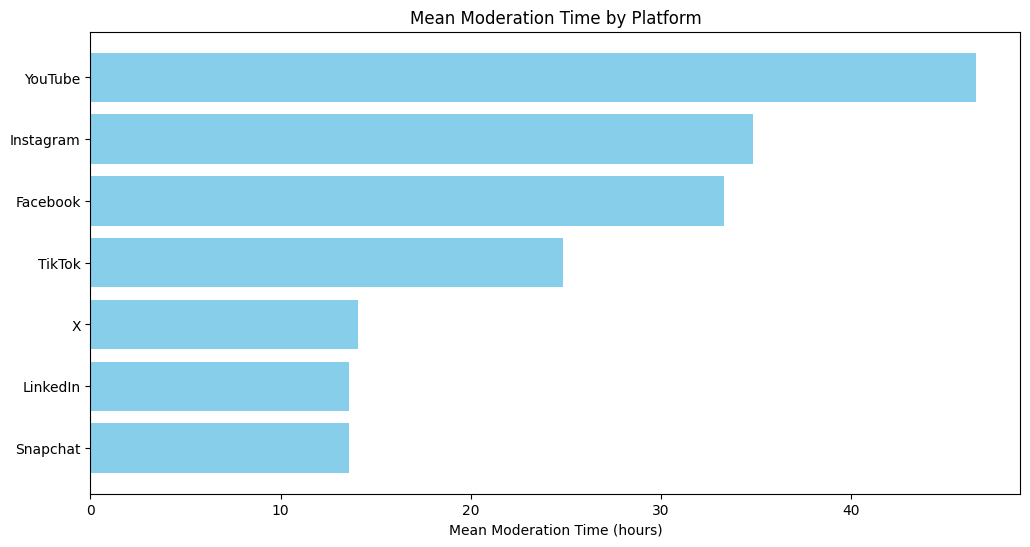

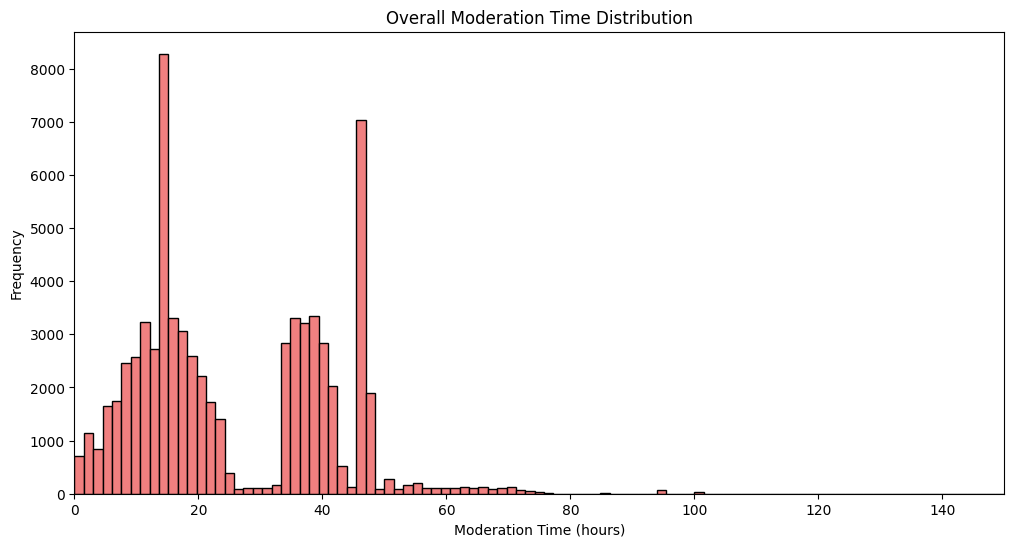

In [20]:
# Convert date columns to datetime format
data['application_date'] = pd.to_datetime(data['application_date'], errors='coerce')
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')

# Calculate moderation time
data['moderation_time'] = (data['created_at'] - data['application_date']).dt.total_seconds() / 3600  # Convert to hours

# Remove invalid or negative moderation times
data = data[data['moderation_time'] >= 0]

# Group by platform and calculate mean, median, and standard deviation
platform_stats = data.groupby('platform_name')['moderation_time'].agg(
    mean_time='mean',  # Mean moderation time in hours
    median_time='median',  # Median moderation time in hours
    std_dev='std'  # Standard deviation in hours
).reset_index()

# Display platform-level statistics
print(platform_stats)

# Plot a bar chart for mean moderation time by platform
plt.figure(figsize=(12, 6))
platform_stats_sorted = platform_stats.sort_values('mean_time', ascending=True)
plt.barh(platform_stats_sorted['platform_name'], platform_stats_sorted['mean_time'], color='skyblue')
plt.xlabel('Mean Moderation Time (hours)')
plt.title('Mean Moderation Time by Platform')
plt.show()

# Plot histogram of overall moderation times
plt.figure(figsize=(12, 6))
plt.hist(data['moderation_time'], bins=np.linspace(0, 150, 100), color='lightcoral', edgecolor='black')
plt.title('Overall Moderation Time Distribution')
plt.xlabel('Moderation Time (hours)')
plt.ylabel('Frequency')
plt.xlim(0, 150)  # Focus on moderation times up to 150 hours
plt.show()

## Hence , it looks like while  youtube takes most of time to make a decision , X is way faster to remove a content . 

### This could explain the space for ilegal content in youtube 